In [20]:
import os
import random
#import telegram_send
import numpy as np 
import pandas as pa
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.preprocessing.image import ImageDataGenerator 
from mtcnn.mtcnn import MTCNN
import cv2
from tensorflow import image

In [21]:
TrainingDir ='C:/Users/abhir/pgms/TensorFlow/Rep0/Images/Train/'
TestingDir = 'C:/Users/abhir/pgms/TensorFlow/Rep0/Images/Test/'
ValDir = 'C:/Users/abhir/pgms/TensorFlow/Rep0/Images/Validation/'

# gen = ImageDataGenerator(rescale=1./255)
# TestGen=gen.flow_from_directory(TestingDir,batch_size=1,target_size=(224,224),color_mode='rgb',class_mode='binary')
genVal = ImageDataGenerator(rescale=1./255)
ValGen=genVal.flow_from_directory(ValDir,batch_size=1,target_size=(224,224),color_mode='rgb',class_mode='binary')
traingenerator = ImageDataGenerator(rescale=1./255)
Gendata = traingenerator.flow_from_directory(directory=TrainingDir,batch_size=32,target_size=(224,224),color_mode='rgb',class_mode='binary')


Found 306 images belonging to 2 classes.
Found 700 images belonging to 2 classes.


In [29]:
Classifier = keras.models.load_model('C:/Users/abhir/pgms/TensorFlow/Rep1')
Classifier.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 222, 222, 64)      1792      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 111, 111, 64)      0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 109, 109, 64)      36928     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 54, 54, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 52, 52, 64)        36928     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 26, 26, 64)        0         
_________________________________________________________________
flatten (Flatten)            (None, 43264)             0

In [5]:
#Classifier.compile(loss='binary_crossentropy',optimizer='adam',metrics=['acc'])

In [26]:
#Classifier = keras.models.load_model('C:/Users/abhir/pgms/TensorFlow/Rep1')
History = Classifier.fit(Gendata,validation_data = ValGen,epochs=5)

Epoch 1/5
 7/22 [========>.....................] - ETA: 37s - loss: 5.8311e-05 - acc: 1.0000

KeyboardInterrupt: 

In [27]:
Classifier.evaluate(ValGen
)

306/306 [==============================] - 18s 56ms/step - loss: 0.0020 - acc: 1.0000


[0.0019504395313560963, 1.0]

In [ ]:
image = cv2.imread()

[array([[1.]], dtype=float32), array([[1.]], dtype=float32), array([[1.]], dtype=float32), array([[1.]], dtype=float32), array([[1.]], dtype=float32), array([[1.]], dtype=float32), array([[1.]], dtype=float32), array([[1.]], dtype=float32), array([[1.]], dtype=float32), array([[1.]], dtype=float32)]


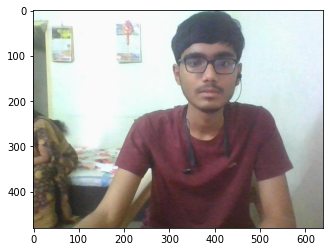

In [49]:
import matplotlib.pyplot as plt
import imutils
from imutils.video import VideoStream
#model = keras.models.load_model('C:/Users/abhir/pgms/TensorFlow/Rep1')
# img = tf.keras.preprocessing.image.load_img('C:/Users/abhir/OneDrive/Pictures/Camera Roll/ppp.jpg',target_size=(224,224),color_mode='rgb',grayscale=False)
video = cv2.VideoStream(0)
Face_detect = MTCNN()
imageList = []
probs = []
n = 0
while True :
    flag,frame = video.read()
    #frame = imutils.resize(frame, width=750, height=750)
    #frame = cv2.flip(frame, 1)
    frame = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)
    # if cv2.waitKey(2) & 0xFF == ord('q'):
    #     break
    #frame = cv2.resize(frame,(224,224))
    if n == 10 :
        break
    n += 1
    vectors = Face_detect.detect_faces(frame)
    #Wprint(vectors)
    for vector in vectors :
        x,y,width,height = vector['box']
        image = frame[y:y + height,x:x + width]
        imageList.append(frame)
        #exit()
        image = cv2.resize(image,(224,224))
        #imageList.append(image)
        
        #cv2.imshow('Frame',image)
        #image = img_to_array(image)
        image = np.array([image])
       
        #print(image.shape)
        image = image/255
        #print(image.shape)
        prob  = Classifier.predict([image]) 
        probs.append(prob)
# plt.imshow(img)
for i in imageList:
    plt.imshow(i)
print(probs)

# img =  tf.keras.preprocessing.image.img_to_array(img)
# img=np.array([img])


#img=np.array(img,dtype=float)
# print(img)
# img = img/255
# print(img)

# array = Classifier.predict([img])
# print(array)

In [28]:
Classifier.save('C:/Users/abhir/pgms/TensorFlow/Rep1/')

INFO:tensorflow:Assets written to: C:/Users/abhir/pgms/TensorFlow/Rep1/assets
